# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [81]:
# Libraries
import numpy as np
import pandas as pd

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [82]:
# your code here
employees = pd.read_csv(r"C:\Users\kyrie\ironhack\DAFT_1022\module_2\Lab_5_ Pivot-Tables-and-Crosstab\Employee.csv")
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [83]:
# Method 1
# your code here
employees.groupby(['Department'], as_index = False)['Salary'].agg('mean')


,Department,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


In [84]:
# Method 2
# your code here
employees.pivot_table(index=["Department"], values=["Salary"], aggfunc="mean")

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [85]:
# your code here
employees.pivot_table(index=["Department"],columns=["Title"] , values=["Salary"], aggfunc="mean")

Salary                  
Title          VP analyst associate
Department                         
HR           70.0    32.5       NaN
IT           70.0    32.5      60.0
Sales         NaN     NaN      55.0

In [86]:
employees.pivot_table(index=["Department","Title"], values=["Salary"], aggfunc="mean")

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [87]:
# your code here
employees.pivot_table(index=["Title"],columns=["Years"] , values=["Salary"], aggfunc="mean")

Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

In [88]:
employees.pivot_table(index=["Title"], values=["Salary","Years"], aggfunc="mean")

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [89]:
# your code here
employees.pivot_table(index=["Department","Title"], values=["Salary","Name"], aggfunc= {"Salary" :"mean", "Name":"count"})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [90]:
# your code here
employees.pivot_table(index=["Department","Title"], values=["Salary"], aggfunc={"median", min, max, np.std})

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70       NaN
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70       NaN
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60       NaN
Sales      associate     55   55.0  55  0.000000

In [91]:
"""
your commments here
"""

'\nyour commments here\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [92]:
# your code here
employees.pivot_table(index=['Department','Title'], values=['Salary'], aggfunc = {min, max, 'median', np.std}).fillna(0)

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60  0.000000
Sales      associate     55   55.0  55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [93]:
# your code here
employees.pivot_table(index=['Department'], values=['Name','Salary'], aggfunc = {'Name':'count', 'Salary': 'sum'})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [94]:
# your code here
employees.pivot_table(index=['Department', 'Title'], values=['Years','Salary'], aggfunc = {'Years':'sum', 'Salary': 'mean'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [95]:
# your code here

def mean_without_max(result):
	'''This is a function that returns a mean value of a list after removing the maximum value'''
	result = list(result)
	result.sort() #classe the values in ascending order
	result.pop(-1) #remove the last value from the list
	sum_res = 0 
	
	return round(np.mean(result))

employees.pivot_table(index=["Department"], values=["Salary"], aggfunc={'Salary': mean_without_max})

,Salary
Department,
HR,32
IT,42
Sales,55


# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [96]:
fitbit = pd.read_csv(r"C:\Users\kyrie\ironhack\DAFT_1022\module_2\Lab_5_ Pivot-Tables-and-Crosstab\Fitbit.csv")


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [97]:
# your code here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [98]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [99]:
correlation=fitbit['Minutes Very Active'].corr(fitbit['Steps'])
correlation

0.5714518481062606

In [100]:
fitbit.corr()

C:\Users\kyrie\AppData\Local\Temp\ipykernel_12992\2431350884.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fitbit.corr()


,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
Calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,0.041999,0.030490,0.017460
Steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,0.124846,0.106591,0.133405
Distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,0.130447,0.091095,0.134550
Floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,0.064587,0.043459,0.075864
Minutes Sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,0.200589,0.178387,0.208539
Minutes Lightly Active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,0.096107,0.087150,0.105406
Minutes Fairly Active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,0.104303,0.100498,0.123034
Minutes Very Active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,0.116559,0.099859,0.115641
Activity Calories,-0.130758,-0.160568,-0.246853,-0.155532,-0.161446,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,0.010859,0.022757,-0.004992
MinutesOfSleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,0.779595,0.780512,0.997184


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [101]:
import matplotlib.pyplot as plt;

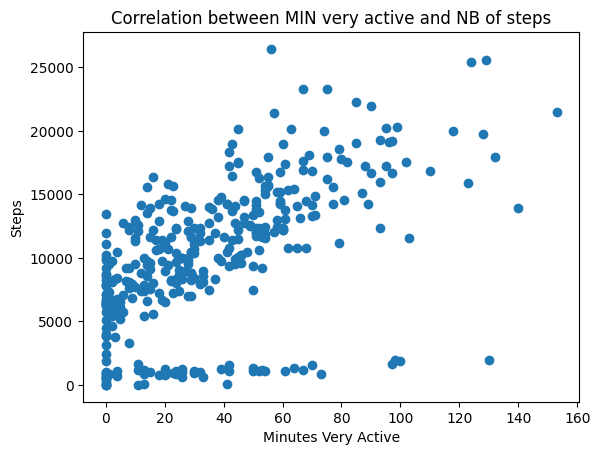

In [102]:
plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.title('Correlation between MIN very active and NB of steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [103]:
"""
your commments here
"""

'\nyour commments here\n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [104]:
correlation2=fitbit['Minutes Sedentary'].corr(fitbit['Steps'])
correlation2


0.07690608062990097

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [105]:
import matplotlib.pyplot as plt;

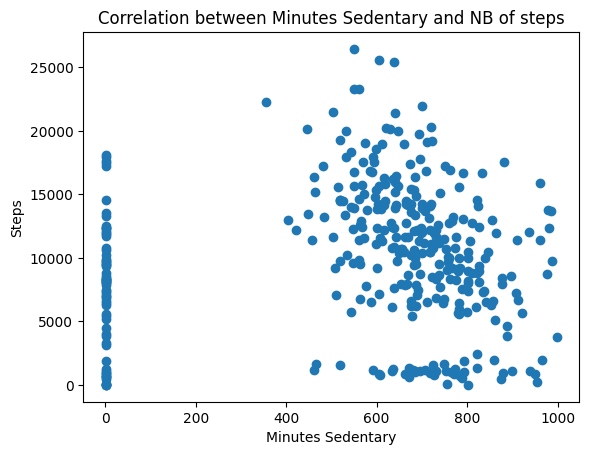

In [106]:
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.title('Correlation between Minutes Sedentary and NB of steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [107]:
correlation3 = fitbit['MinutesOfSleep'].corr(fitbit['Steps'])
correlation3

0.13098565950836388

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

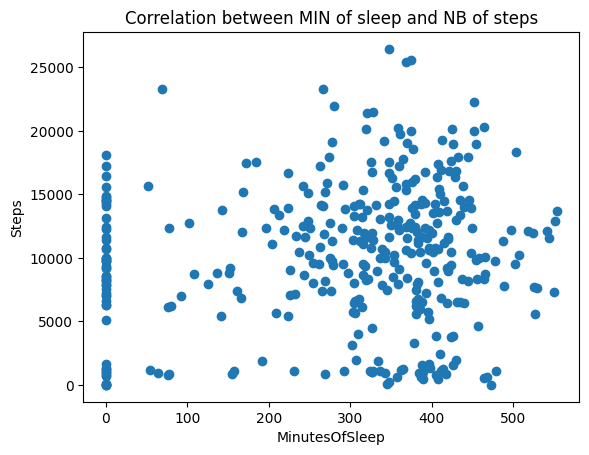

In [108]:
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.title('Correlation between MIN of sleep and NB of steps')
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.show()

In [109]:
"""
there doesn't seem to be any correlation between the two
"""

"\nthere doesn't seem to be any correlation between the two\n"

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [110]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [111]:
cor_fit = fitbit[columns].corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [112]:
cor_fit['Steps'].sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [121]:
# your code here
time_grades=pd.read_csv(r"C:\Users\kyrie\ironhack\DAFT_1022\module_2\Lab_5_ Pivot-Tables-and-Crosstab\Time_Grades.csv")
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

<AxesSubplot:>

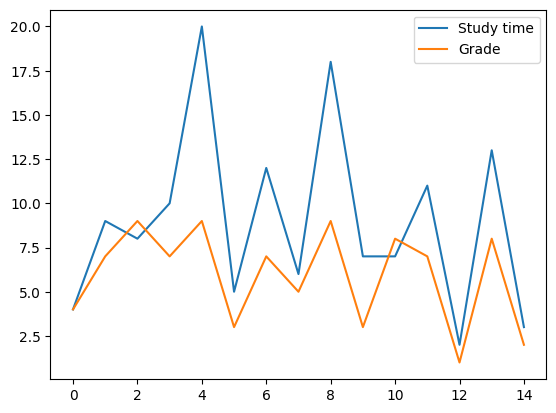

In [125]:
# your code here
time_grades.plot()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [123]:
# your code here
cor_pear=time_grades.corr(method='pearson')
cor_spear=time_grades.corr(method='spearman')
print(cor_pear)
print('\n above:pearson, below:spearman \n')
print(cor_spear)

            Study time     Grade
Study time    1.000000  0.798046
Grade         0.798046  1.000000

 above:pearson, below:spearman 

            Study time     Grade
Study time    1.000000  0.819659
Grade         0.819659  1.000000


C:\Users\kyrie\AppData\Local\Temp\ipykernel_12992\1289268124.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_pear=time_grades.corr(method='pearson')
C:\Users\kyrie\AppData\Local\Temp\ipykernel_12992\1289268124.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_spear=time_grades.corr(method='spearman')


In [116]:
"""
both methods proved that there is a strong correlation between Grade & Study time
"""

'\nyour commments here\n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

Text(0.5, 1.0, 'cor of time & grade')

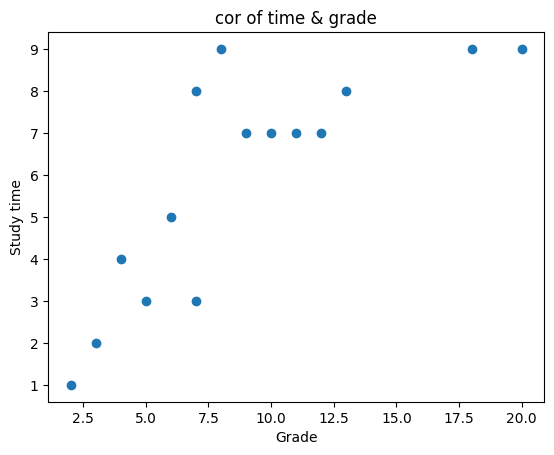

In [126]:
tg = time_grades
plt.scatter(tg['Study time'],tg['Grade'])
plt.xlabel('Grade')
plt.ylabel('Study time')
plt.title('cor of time & grade')

In [118]:
"""
students with best grades mostly study a lot
students who don't really study get grades below average
seems like 7h is a min enough time to have a comparable good grade(>7)
"""

'\nyour commments here\n'

#### Could you explain the difference between Pearson and Spearman correlations?

In [119]:
"""
The fundamental difference between the two correlation coefficients is that the Pearson coefficient works with a linear relationship between the two variables whereas the Spearman Coefficient works with monotonic relationships as well.
Pearson works with raw data values of the variables whereas Spearman works with rank-ordered variables.
"""

'\nyour commments here\n'